#📌 Extracão

In [19]:
# Etapa de Extração: Carregando os dados da API
# Esta etapa utiliza a biblioteca requests para buscar dados de uma API e carrega seu conteúdo em um DataFrame pandas.
import pandas as pd
import requests
import json

# URL da API
api_url = 'https://raw.githubusercontent.com/PedrogitMendes/Telecom-X/refs/heads/main/Telecom%20X%20Challenge/TelecomX_Data.json'

try:
    response = requests.get(api_url)
    response.raise_for_status() # Levanta um erro para códigos de status HTTP ruins (4xx ou 5xx)
    data = response.json()
    df = pd.DataFrame(data)
    print("Dados carregados com sucesso da API!")
    display(df.head())
except requests.exceptions.RequestException as e:
    print(f"Erro ao conectar ou buscar dados da API: {e}")
except json.JSONDecodeError:
    print(f"Erro ao decodificar a resposta JSON da API. Verifique se a resposta está no formato JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Dados carregados com sucesso da API!


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [20]:
# Etapa de Transformação: Verificando valores ausentes e achatando colunas aninhadas
# Aqui foi verificado se há valores nulos e foram expandidas as colunas que contêm dicionários aninhados em novas colunas.
print("Verificando valores ausentes:")
print(df.isnull().sum())

nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    df = pd.concat([df.drop(col, axis=1), df[col].apply(pd.Series)], axis=1)

df = pd.concat([df.drop('Charges', axis=1), df['Charges'].apply(pd.Series)], axis=1)

print("\nVerificando linhas duplicadas após achatar colunas aninhadas:")
print(df.duplicated().sum())

print("\nDataFrame após achatar colunas aninhadas:")
display(df.head())

Verificando valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Verificando linhas duplicadas após achatar colunas aninhadas:
0

DataFrame após achatar colunas aninhadas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
# Etapa de Transformação: Renomeando coluna, convertendo tipo e tratando valores inconsistentes
# Aqui a coluna 'Total' foi renomeada para 'TotalCharges', converti para numérico e tratei valores ausentes. Também foram verificados os valores únicos em colunas categóricas.
df.rename(columns={'Total': 'TotalCharges'}, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Valores ausentes em 'TotalCharges' após conversão:")
print(df['TotalCharges'].isnull().sum())

df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("\nTipo de dado da coluna 'TotalCharges':")
print(df['TotalCharges'].dtype)

categorical_cols_to_check = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                             'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                             'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

print("\nVerificando valores únicos em colunas categóricas:")
for col in categorical_cols_to_check:
    if col in df.columns:
        print(f"\nColuna '{col}':")
        print(df[col].unique())
    else:
        print(f"\nColuna '{col}' não encontrada no DataFrame.")

Valores ausentes em 'TotalCharges' após conversão:
11

Tipo de dado da coluna 'TotalCharges':
float64

Verificando valores únicos em colunas categóricas:

Coluna 'gender':
['Female' 'Male']

Coluna 'SeniorCitizen':
[0 1]

Coluna 'Partner':
['Yes' 'No']

Coluna 'Dependents':
['Yes' 'No']

Coluna 'PhoneService':
['Yes' 'No']

Coluna 'MultipleLines':
['No' 'Yes' 'No phone service']

Coluna 'InternetService':
['DSL' 'Fiber optic' 'No']

Coluna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Coluna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Coluna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Coluna 'TechSupport':
['Yes' 'No' 'No internet service']

Coluna 'StreamingTV':
['Yes' 'No' 'No internet service']

Coluna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Coluna 'Contract':
['One year' 'Month-to-month' 'Two year']

Coluna 'PaperlessBilling':
['Yes' 'No']

Coluna 'PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer

In [22]:
# Etapa de Transformação: Padronizando valores em colunas categóricas
# Nesta etapa, foram corrigidas inconsistências nos valores de algumas colunas categóricas para garantir uniformidade.
df['Churn'] = df['Churn'].replace('', 'No')

cols_to_replace_no_service = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                              'DeviceProtection', 'TechSupport', 'StreamingTV',
                              'StreamingMovies']

for col in cols_to_replace_no_service:
    if 'No internet service' in df[col].unique():
        df[col] = df[col].replace('No internet service', 'No')
    if 'No phone service' in df[col].unique():
         df[col] = df[col].replace('No phone service', 'No')

print("\nVerificando valores únicos em colunas categóricas após a limpeza:")
for col in categorical_cols_to_check:
    if col in df.columns:
        print(f"\nColuna '{col}':")
        print(df[col].unique())
    else:
        print(f"\nColuna '{col}' não encontrada no DataFrame.")


Verificando valores únicos em colunas categóricas após a limpeza:

Coluna 'gender':
['Female' 'Male']

Coluna 'SeniorCitizen':
[0 1]

Coluna 'Partner':
['Yes' 'No']

Coluna 'Dependents':
['Yes' 'No']

Coluna 'PhoneService':
['Yes' 'No']

Coluna 'MultipleLines':
['No' 'Yes']

Coluna 'InternetService':
['DSL' 'Fiber optic' 'No']

Coluna 'OnlineSecurity':
['No' 'Yes']

Coluna 'OnlineBackup':
['Yes' 'No']

Coluna 'DeviceProtection':
['No' 'Yes']

Coluna 'TechSupport':
['Yes' 'No']

Coluna 'StreamingTV':
['Yes' 'No']

Coluna 'StreamingMovies':
['No' 'Yes']

Coluna 'Contract':
['One year' 'Month-to-month' 'Two year']

Coluna 'PaperlessBilling':
['Yes' 'No']

Coluna 'PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Coluna 'Churn':
['No' 'Yes']


In [23]:
# Etapa de Transformação: Criando a coluna 'Contas_Diarias'
# Calcula uma nova coluna 'Contas_Diarias' dividindo os encargos mensais por 30.
df['Contas_Diarias'] = df['Monthly'] / 30

print("DataFrame com a nova coluna 'Contas_Diarias':")
display(df[['customerID', 'Monthly', 'Contas_Diarias']].head())

DataFrame com a nova coluna 'Contas_Diarias':


,customerID,Monthly,Contas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


In [24]:
# Exibe os tipos de dados de todas as colunas
print("\nTipos de dados de todas as colunas:")
print(df.dtypes)


Tipos de dados de todas as colunas:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
TotalCharges        float64
Contas_Diarias      float64
dtype: object


#📊 Carga e análise

In [25]:
# Etapa de Análise: Realizando análise descritiva e contagem de valores
# Aqui apresento as estatísticas descritivas para as colunas numéricas e a contagem de valores para as colunas categóricas.
print("Análise Descritiva do DataFrame:")
display(df.describe())

print("\nContagem de valores para colunas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColuna '{col}':")
    print(df[col].value_counts())

Análise Descritiva do DataFrame:


,SeniorCitizen,tenure,Monthly,TotalCharges,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333



Contagem de valores para colunas categóricas:

Coluna 'customerID':
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Coluna 'Churn':
Churn
No     5398
Yes    1869
Name: count, dtype: int64

Coluna 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna 'MultipleLines':
MultipleLines
No     4202
Yes    3065
Name: count, dtype: int64

Coluna 'InternetService':
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna 'OnlineSecurity':
OnlineSecurity
No     5189
Yes    2078
Name: count, dtype: 

In [26]:
# Etapa de Análise: Visualizando a distribuição da variável 'Churn'
# Gerei gráficos (barras e pizza) para mostrar a distribuição geral de clientes que evadiram e não evadiram.
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis', hue='Churn', legend=False)
plt.title('Distribuição de Clientes por Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.savefig('churn_distribution_bar.png') # Salva o gráfico de barras como PNG
plt.close() # Fecha a figura para não exibir no output


# Gráfico de pizza
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Proporção de Clientes por Evasão (Churn)')
plt.savefig('churn_distribution_pie.png') # Salva o gráfico de pizza como PNG
plt.close() # Fecha a figura para não exibir no output

### Análise de Churn por Variáveis Categóricas

Para entender como as diferentes características dos clientes influenciam a probabilidade de Churn, realizamos uma análise exploratória visualizando a distribuição de clientes que evadiram ('Yes') e não evadiram ('No') para cada variável categórica. Os gráficos de contagem abaixo ilustram a relação entre cada categoria e a taxa de evasão.

In [27]:
# Etapa de Análise: Visualizando a distribuição de Churn por variáveis categóricas
# Criei gráficos de contagem para cada variável categórica, mostrando a relação entre a categoria e a evasão de clientes.
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'churn_by_{col}.png') # Salva o gráfico como PNG
    plt.close() # Fecha a figura para não exibir no output

### Análise de Churn por Variáveis Numéricas

Para analisar como as variáveis numéricas se distribuem entre clientes que evadiram ('Yes') e não evadiram ('No'), utilizei box plots e histogramas. Estes gráficos permitem comparar as medianas, quartis, dispersão e a forma geral da distribuição para cada grupo de Churn.

In [28]:
# Etapa de Análise: Visualizando a distribuição de variáveis numéricas por Churn
# Gerei box plots e histogramas para analisar como a distribuição de variáveis numéricas varia entre clientes que evadiram e não evadiram.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['tenure', 'Monthly', 'TotalCharges', 'Contas_Diarias']

for col in numerical_cols:
    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis', hue='Churn', legend=False)
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.savefig(f'{col}_distribution_boxplot.png') # Salva o box plot como PNG
    plt.close() # Fecha a figura para não exibir no output

    # Histograma
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Histograma de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.savefig(f'{col}_distribution_histogram.png') # Salva o histograma como PNG
    plt.close() # Fecha a figura para não exibir no output

### Colunas Mais Relevantes para a Previsão de Churn

Com base na análise exploratória de dados, as seguintes colunas demonstraram ter uma relação significativa com a probabilidade de evasão de clientes (Churn):

*   **tenure:** Clientes com menor tempo de contrato ('tenure') são significativamente mais propensos a evadir, indicando que o período inicial de serviço é crítico para a retenção.
*   **Contract:** O tipo de contrato é um forte preditor de Churn, com clientes de contratos mensais ('Month-to-month') apresentando uma taxa de evasão consideravelmente maior.
*   **InternetService:** Clientes com serviço de internet Fiber optic têm maior probabilidade de Churn em comparação com aqueles que usam DSL ou não têm serviço de internet.
*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:** A ausência desses serviços adicionais está associada a uma maior propensão ao Churn, sugerindo que esses serviços agregam valor e contribuem para a fidelização.
*   **TotalCharges:** Clientes com encargos totais mais altos tendem a ter uma maior taxa de Churn, possivelmente indicando sensibilidade ao preço ou menor percepção de valor em relação ao custo.
*   **Monthly:** Similar a TotalCharges, encargos mensais mais altos também estão correlacionados com uma maior probabilidade de Churn.
*   **PaymentMethod:** O método de pagamento 'Electronic check' se destacou por ter uma taxa de Churn superior a outros métodos.
*   **Partner e Dependents:** Clientes sem parceiros ou dependentes mostraram uma tendência maior a evadir, o que pode indicar que a decisão de Churn é menos influenciada por responsabilidades familiares.

Essas variáveis são as mais relevantes para a construção de um modelo preditivo de Churn, pois demonstraram, através das visualizações e análises, diferentes padrões de distribuição entre clientes que evadiram e não evadiram.

#📄Relatorio Final

**Dicionário de Dados:** Para uma compreensão detalhada de cada coluna e seus valores, consulte o dicionário de dados disponível [aqui](https://raw.githubusercontent.com/PedrogitMendes/Telecom-X/refs/heads/main/Telecom%20X%20Challenge/TelecomX_dicionario.md).

## Relatório Final: Análise de Evasão de Clientes (Churn)

### Introdução

A evasão de clientes, conhecida como Churn, representa um dos maiores desafios para as empresas no setor de telecomunicações. O Churn não apenas implica na perda de receita direta dos clientes que cancelam seus serviços, mas também acarreta custos associados à aquisição de novos clientes para substituir os perdidos. Entender **o que leva um cliente a decidir parar de usar um serviço** é fundamental para desenvolver estratégias de retenção eficazes e, consequentemente, garantir a sustentabilidade e o crescimento do negócio a longo prazo.

O objetivo principal desta análise é investigar e compreender os principais fatores que contribuem para a evasão de clientes (Churn) na TelecomX. Através da análise exploratória de um conjunto de dados de clientes, buscarei identificar padrões, correlações e características que distinguem clientes que evadem daqueles que permanecem. Os insights obtidos a partir desta análise servirão como base para o desenvolvimento de **recomendações estratégicas e acionáveis** destinadas a reduzir a taxa de Churn e melhorar a retenção de clientes na TelecomX.

### Etapa de Extração, Limpeza e Tratamento de Dados

A qualidade dos dados é a base para qualquer análise confiável. Portanto, a etapa de preparação dos dados foi realizada com rigor.

1.  **Extração dos Dados:** Os dados brutos foram extraídos diretamente de uma API. Utilizando a biblioteca `requests`, fiz uma requisição HTTP para a URL fornecida, obtive a resposta em formato JSON e, em seguida, carreguei esses dados em um DataFrame pandas para manipulação.

2.  **Limpeza e Tratamento de Dados:** Após a extração bem-sucedida, foi realizada uma série de etapas de limpeza e tratamento para garantir a qualidade e usabilidade dos dados. Primeiramente, realizei uma **verificação inicial de valores ausentes** utilizando `df.isnull().sum()` e **verifiquei a presença de linhas duplicadas** com `df.duplicated().sum()`. Identifiquei que algumas colunas ('customer', 'phone', 'internet', 'account', 'Charges') continham estruturas de dados aninhadas (dicionários). Para facilitar a análise, **"achatei" essas colunas**, expandindo cada chave dos dicionários em novas colunas no DataFrame principal, tornando todos os atributos do cliente diretamente acessíveis. A coluna referente aos encargos totais, renomeada para 'TotalCharges', foi **convertida para o tipo numérico** utilizando `pd.to_numeric` com `errors='coerce'` para tratar valores inconsistentes, e os valores resultantes como `NaN` (identifiquei 11) foram **preenchidos com 0**. Por fim, para garantir a uniformidade dos dados categóricos, **padronizei os valores** em colunas como 'Churn' (substituindo vazios por 'No') e em colunas relacionadas a serviços adicionais (substituindo termos como 'No phone service' ou 'No internet service' por 'No'). Além disso, criei uma nova feature, 'Contas_Diarias', dividindo os encargos mensais por 30.

### Análise Exploratória de Dados

A análise exploratória foi realizada para descobrir padrões, entender as distribuições das variáveis e visualizar a relação entre elas e o Churn.

1.  **Análise Descritiva:** Realizei uma análise descritiva das colunas numéricas ('SeniorCitizen', 'tenure', 'Monthly', 'TotalCharges', 'Contas_Diarias') para obter um resumo estatístico básico, incluindo contagem, média, desvio padrão, valores mínimo e máximo, e quartis.
    *   **Média de Tenure:** A média de tempo de contrato é de aproximadamente 32 meses.
    *   **Média de Encargos Mensais:** O valor médio dos encargos mensais é de cerca de 64.72.
    *   **Média de Encargos Totais:** O valor médio dos encargos totais é de aproximadamente 2277.18.
    *   As estatísticas descritivas ajudam a entender a distribuição central e a dispersão dos dados numéricos.

2.  **Distribuição de Churn:** Para obter uma compreensão clara da distribuição da variável alvo, Churn, gerei dois tipos de gráficos: um gráfico de barras e um gráfico de pizza. O gráfico de barras mostrou a contagem absoluta de clientes em cada categoria de Churn ('Yes' para evasão, 'No' para não evasão), permitindo ver o desbalanceamento entre as classes. O gráfico de pizza complementou essa visão, apresentando a proporção percentual de clientes em cada categoria de Churn. Esta análise inicial confirmou que a base de clientes é majoritariamente de não evadidos, mas com uma parcela significativa (aproximadamente 25.7%) de clientes que evadiram, reforçando a necessidade de investigar os fatores por trás desse comportamento para reduzir essa taxa.

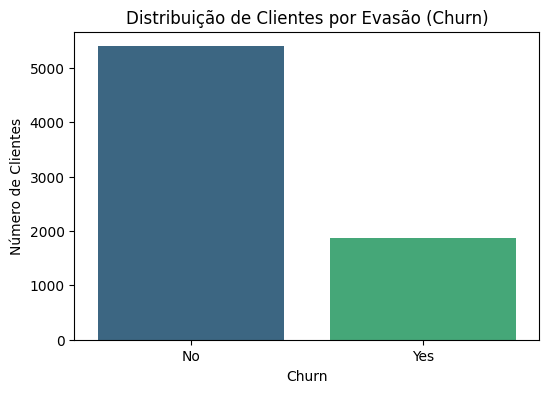

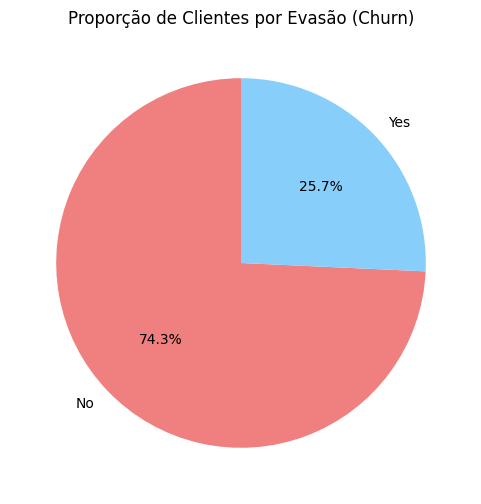

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis', hue='Churn', legend=False)
plt.title('Distribuição de Clientes por Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de pizza
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Proporção de Clientes por Evasão (Churn)')
plt.show()

3.  **Análise por Variáveis Categóricas:** Para investigar como cada variável categórica se relaciona com a probabilidade de Churn, criei gráficos de contagem para cada uma delas. Em cada gráfico, utilizei a variável categórica no eixo X e a contagem de clientes no eixo Y, com a variável 'Churn' definida como o parâmetro `hue`. Isso dividiu as barras em cada categoria pela cor, representando a distribuição de clientes com e sem Churn dentro dessa categoria. Esta abordagem visual permitiu identificar rapidamente quais categorias dentro de cada variável tinham uma proporção maior de clientes que evadiram. Os insights chave desta análise incluíram:
    *   Clientes com o tipo de contrato 'Month-to-month' exibiram uma taxa de Churn notavelmente mais alta em comparação com clientes com contratos de 'One year' ou 'Two year'. Isso é um indicativo forte de que a falta de um compromisso de longo prazo torna os clientes mais propensos a cancelar.
    *   A ausência de serviços adicionais como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, StreamingTV e StreamingMovies foi consistentemente associada a uma maior propensão ao Churn. Clientes que utilizam esses serviços parecem estar mais "presos" ao ecossistema da TelecomX e percebem maior valor, tornando-os menos propensos a evadir.
    *   O método de pagamento 'Electronic check' destacou-se por apresentar uma taxa de Churn consideravelmente superior aos outros métodos (Mailed check, Bank transfer, Credit card). Isso sugere que pode haver atrito no processo de pagamento eletrônico ou que este método é preferido por clientes que já estão insatisfeitos ou planejando cancelar.
    *   Clientes que não possuíam parceiros ou dependentes em seus planos mostraram uma tendência maior a evadir. Isso pode indicar que a decisão de Churn é mais individualizada e menos influenciada por responsabilidades familiares ou a necessidade de manter múltiplos usuários conectados.

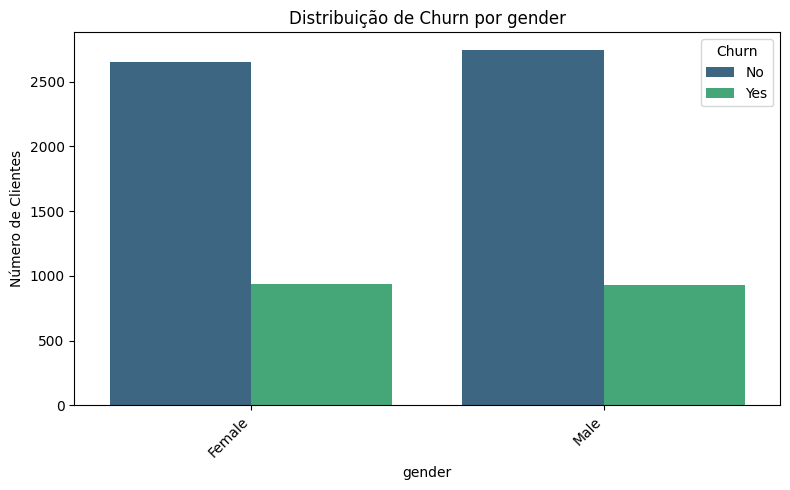

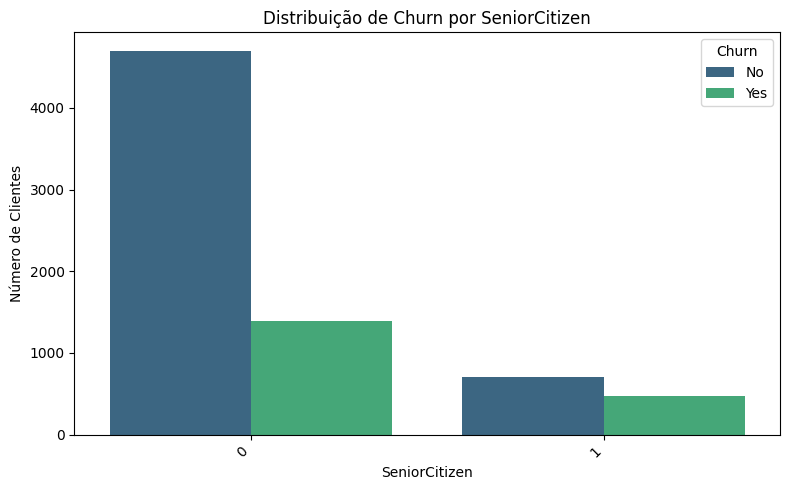

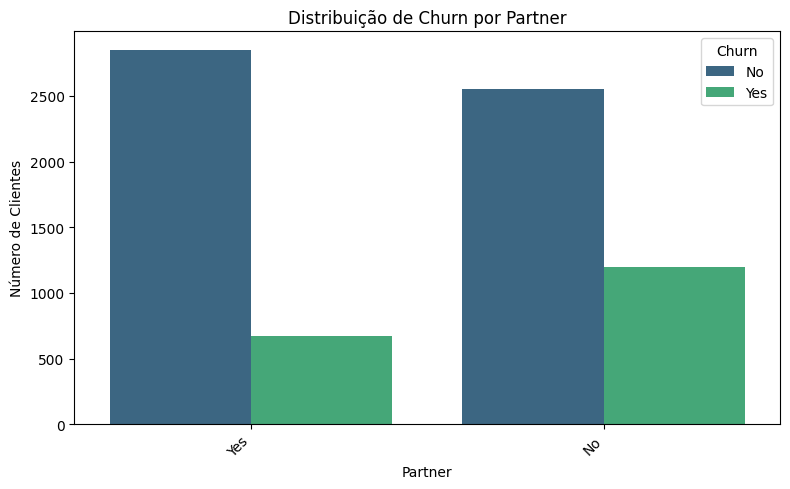

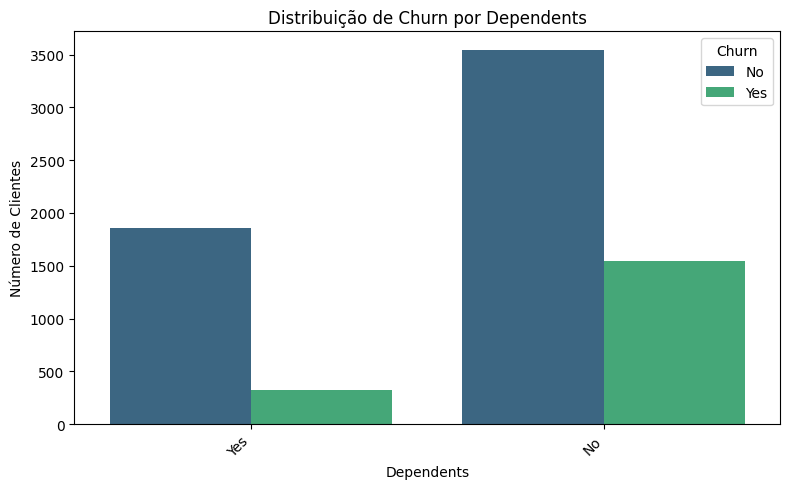

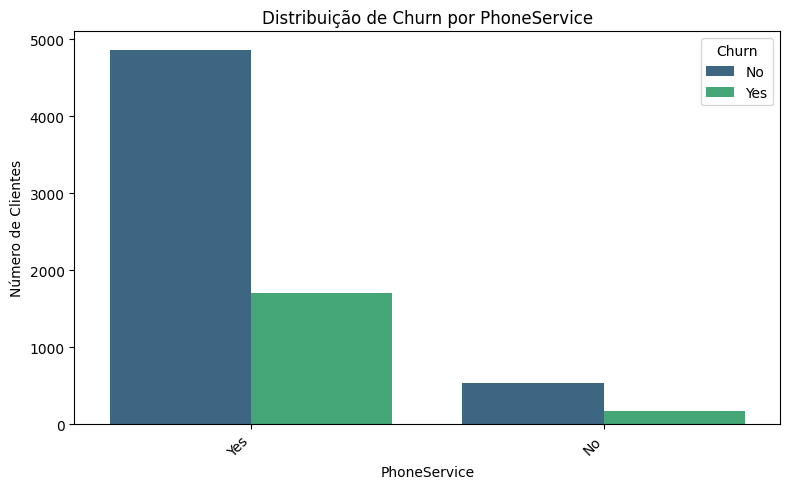

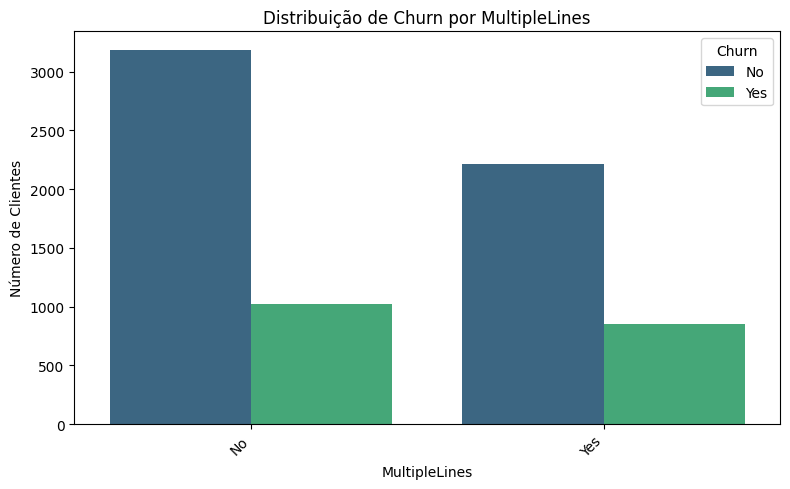

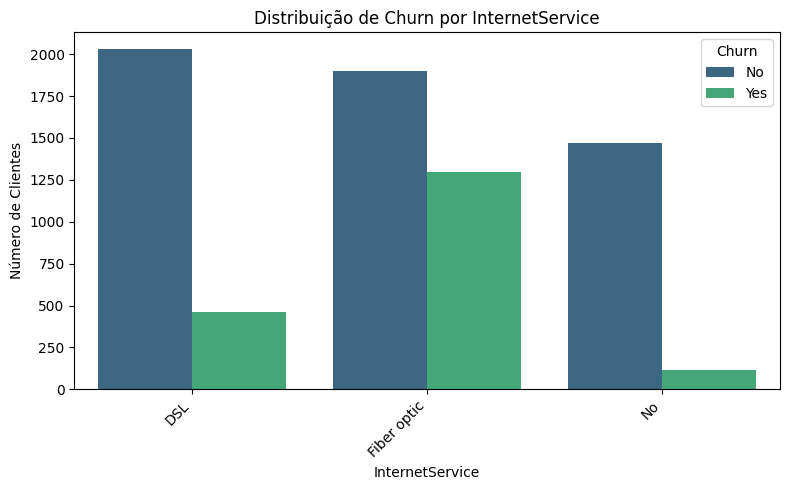

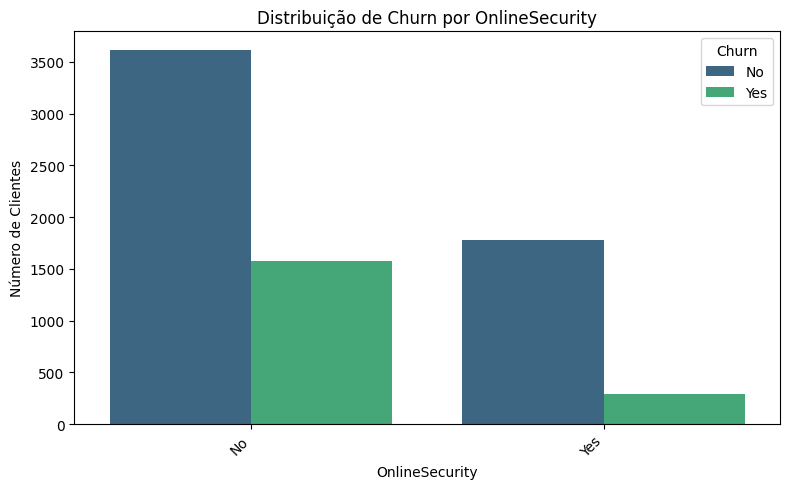

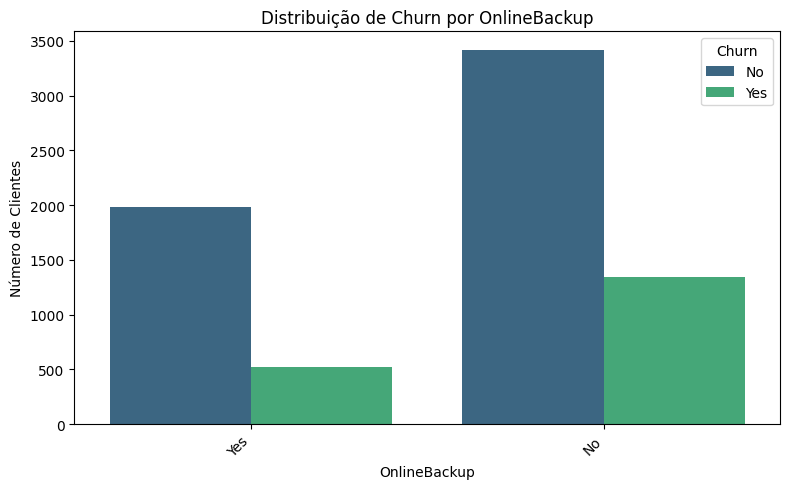

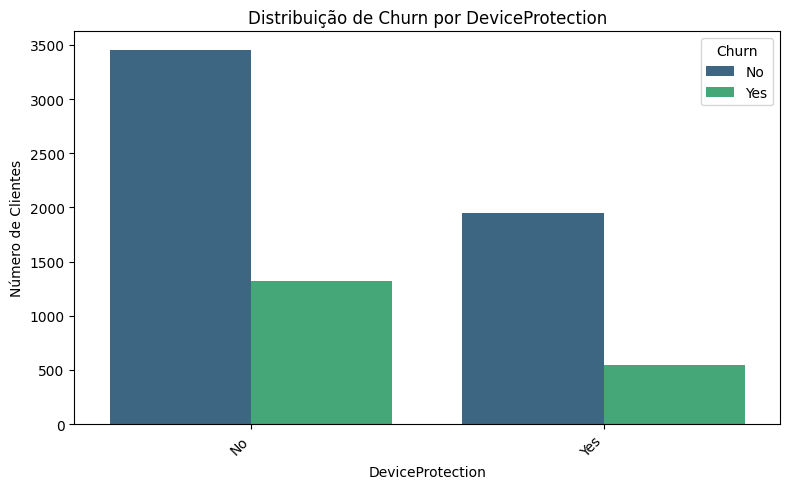

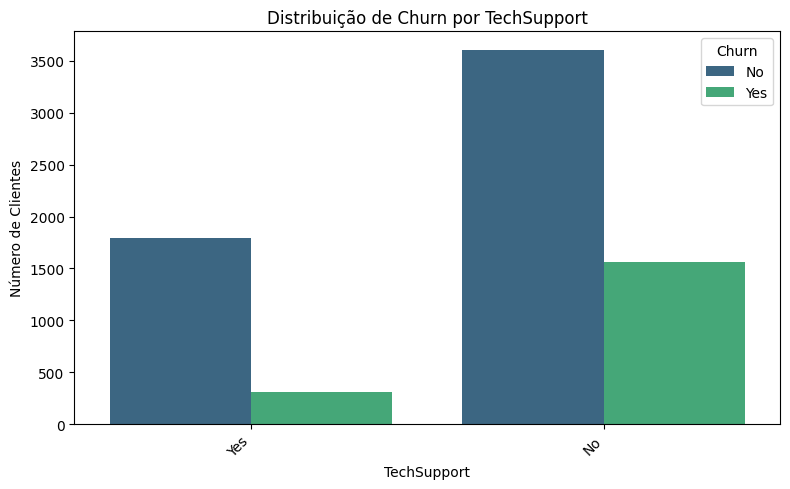

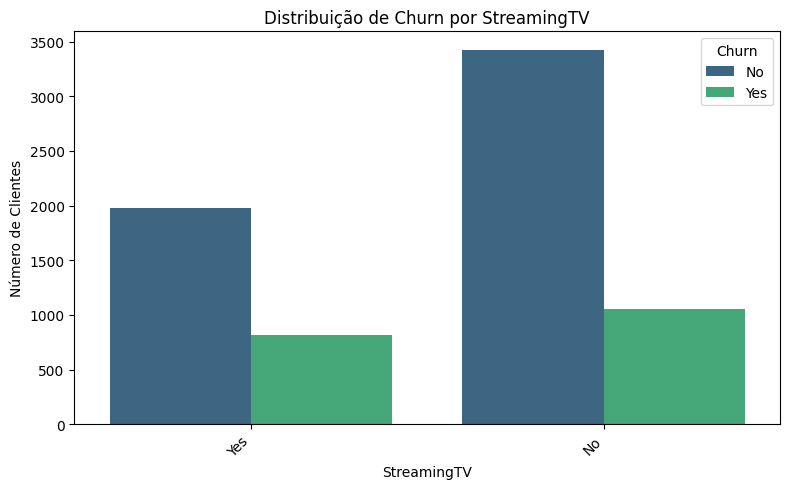

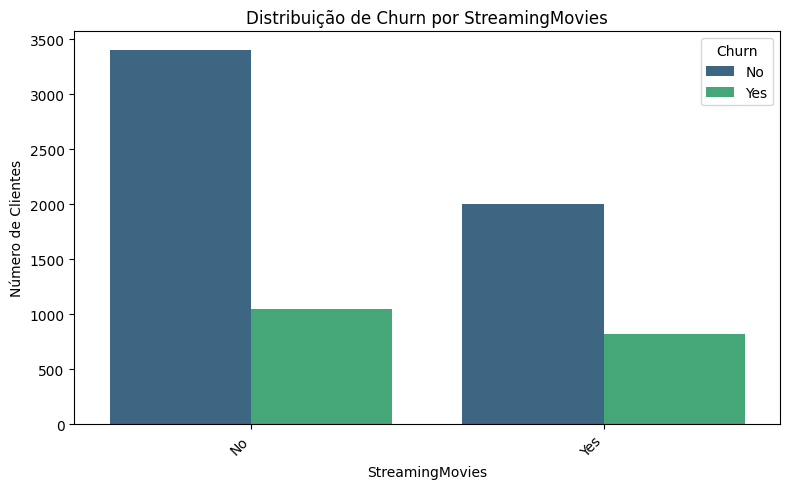

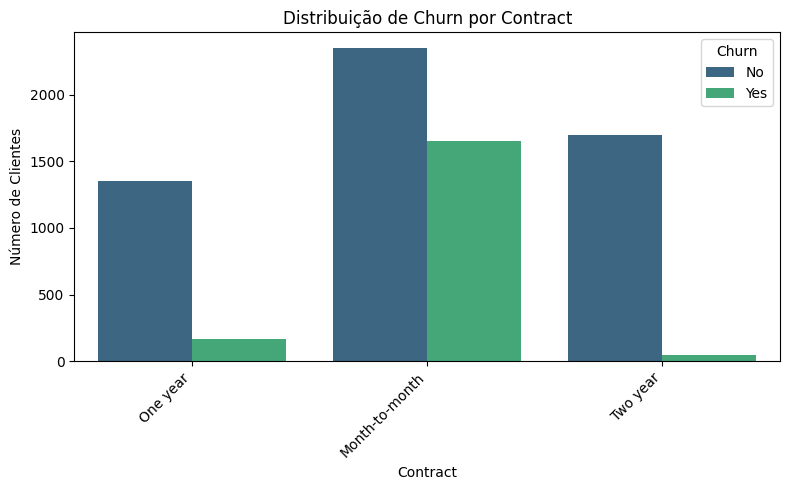

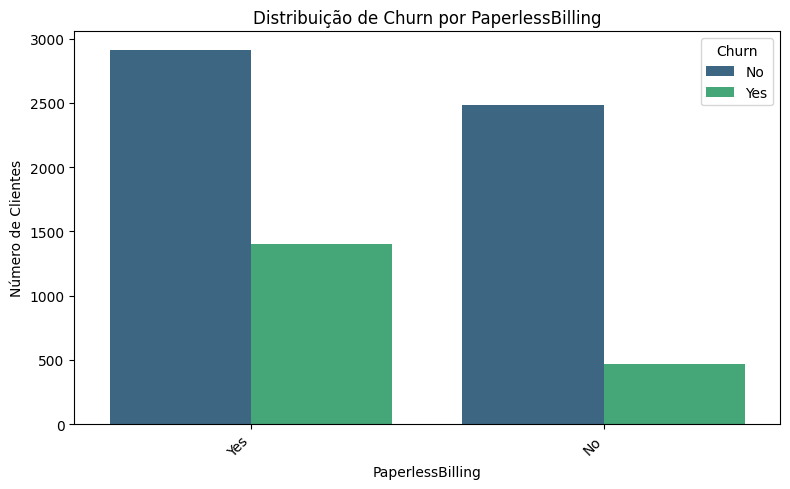

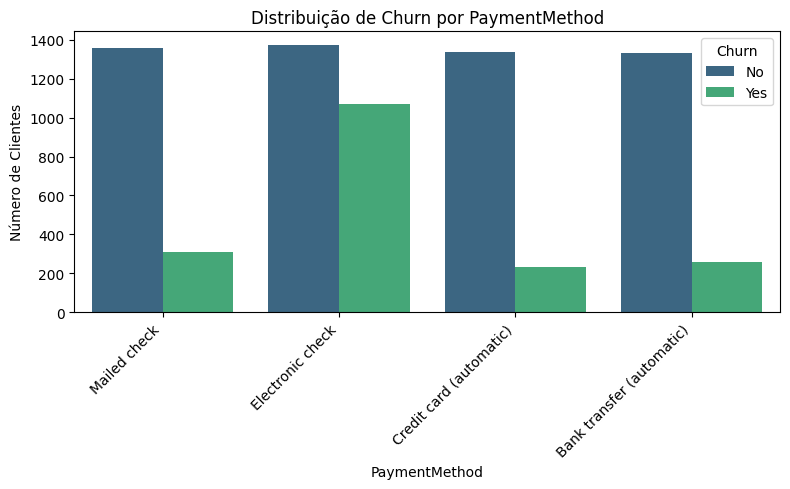

In [30]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

4.  **Análise por Variáveis Numéricas:** Para as colunas numéricas mais relevantes para entender o comportamento do cliente ('tenure', 'Monthly', 'TotalCharges', e a nova feature 'Contas_Diarias'), utilizei box plots e histogramas para visualizar suas distribuições em relação à variável Churn. Os box plots foram escolhidos por serem excelentes para comparar a dispersão, a mediana e a presença de outliers em uma variável numérica entre diferentes grupos (Churn 'Yes' vs 'No'). Os histogramas, por sua vez, permitiram visualizar a frequência de valores dentro de intervalos para cada grupo de Churn, revelando a forma da distribuição. Os principais achados desta análise foram:
    *   Clientes que evadiram ('Yes') apresentaram consistentemente um 'tenure' (tempo de contrato com a empresa) significativamente menor do que aqueles que não evadiram ('No'). A distribuição de 'tenure' para clientes com Churn é fortemente inclinada para valores menores, indicando que a maioria das evasões ocorre nos primeiros meses de serviço. Isso sugere que a experiência inicial do cliente é um fator crítico na retenção.
    *   Clientes com Churn ('Yes') tenderam a ter valores médios e medianos mais altos para 'Monthly' (encargos mensais) e 'TotalCharges' (encargos totais) em comparação com clientes sem Churn ('No'). Isso pode indicar que clientes que pagam mais por seus serviços são mais sensíveis ao preço ou percebem menos valor em relação ao custo, levando-os a buscar alternativas. A variável 'Contas_Diarias', derivada de 'Monthly', exibiu um padrão similar, reforçando a correlação entre custos mais altos e Churn.

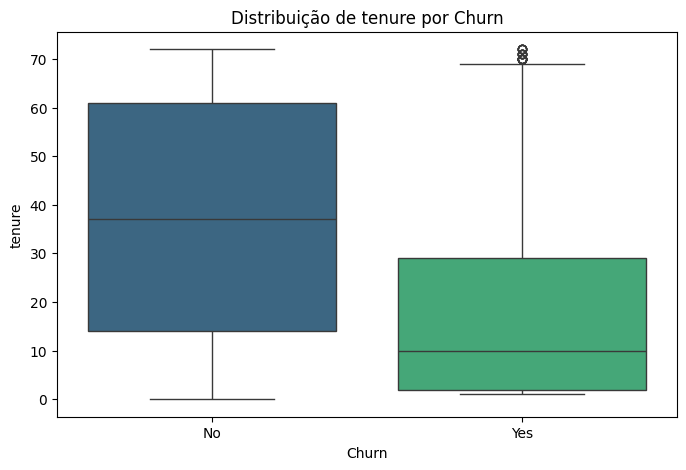

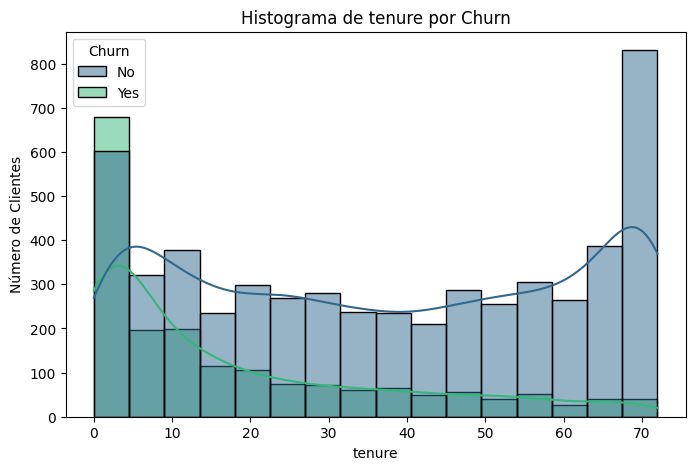

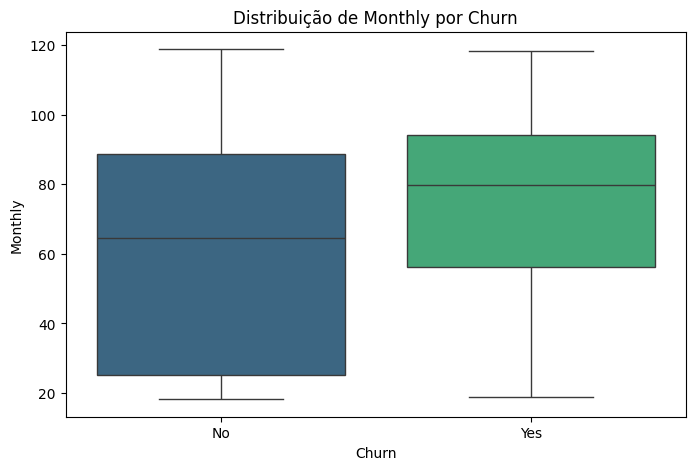

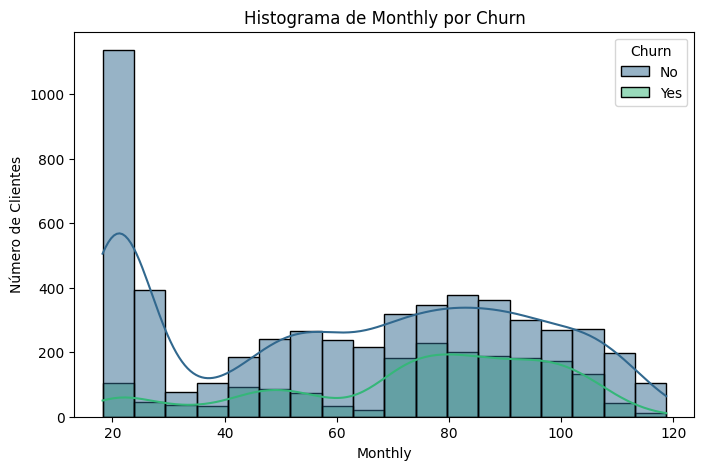

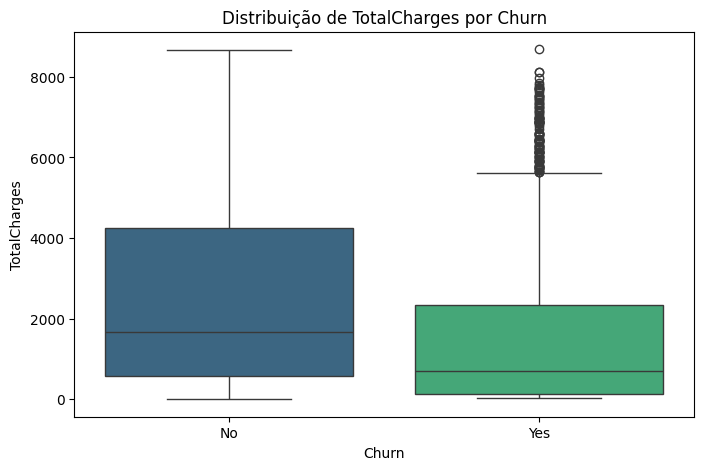

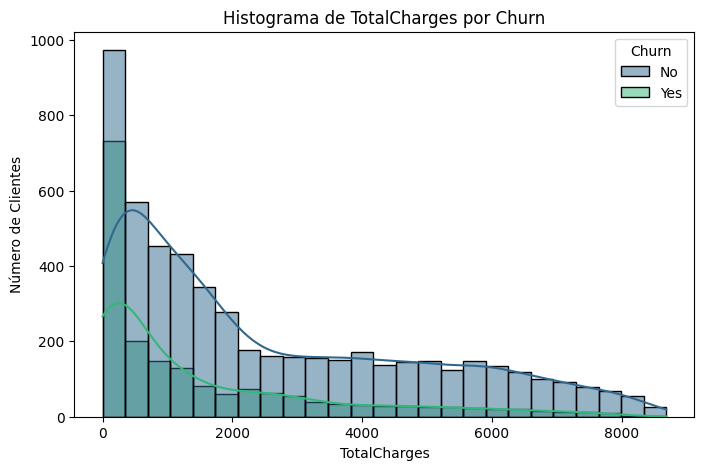

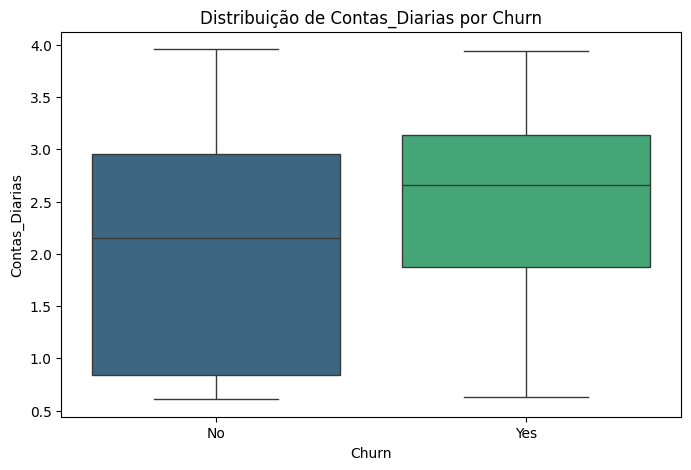

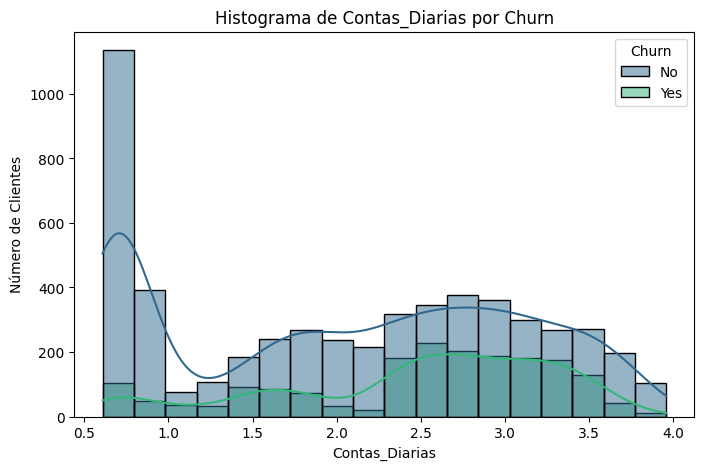

In [31]:
numerical_cols = ['tenure', 'Monthly', 'TotalCharges', 'Contas_Diarias']

for col in numerical_cols:
    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis', hue='Churn', legend=False)
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

    # Histograma
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Histograma de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.show()

### Conclusões e Insights

A análise exploratória de dados realizada forneceu insights valiosos e acionáveis, permitindo identificar claramente alguns dos principais impulsionadores do Churn na TelecomX:

-   **Tipo de Contrato:** O tipo de contrato é um dos preditores mais fortes de Churn. Clientes com contratos de curto prazo (Month-to-month) representam um grupo de alto risco significativo, demandando atenção especial em termos de estratégias de retenção.
-   **Serviços Adicionais:** A adesão a serviços de segurança online e suporte técnico está fortemente associada a uma menor probabilidade de Churn. Isso indica que estes serviços não são apenas fontes de receita adicional, mas também agregam valor percebido pelo cliente e contribuem para a sua fidelização e satisfação.
-   **Método de Pagamento:** O método de pagamento eletrônico é um indicador de maior risco de Churn. É crucial investigar as razões subjacentes a essa correlação para mitigar o risco.
-   **Tempo de Contrato (Tenure):** Clientes nos primeiros meses de contrato são significativamente mais propensos a evadir. O período inicial da jornada do cliente é um ponto crítico onde a experiência do cliente deve ser otimizada para garantir a retenção a longo prazo.
-   **Encargos:** Clientes com encargos mensais e totais mais altos tendem a ter uma maior taxa de Churn. Isso sugere que a percepção de valor versus custo é um fator importante na decisão de Churn.

**Concluímos que clientes com contratos mensais, alta cobrança mensal e total, baixo tempo de permanência (tenure), ausência de serviços adicionais como segurança online e suporte técnico, e aqueles que utilizam o método de pagamento eletrônico, apresentam maior risco de evasão (Churn).** Esse conhecimento é fundamental para a TelecomX identificar clientes em risco, entender as causas subjacentes à evasão e direcionar esforços de retenção de forma mais eficaz.

### Recomendações

Com base nos insights robustos obtidos a partir da análise de dados, as seguintes recomendações estratégicas podem ser implementadas pela TelecomX para reduzir efetivamente a evasão de clientes e aumentar a retenção:

-   **Incentivar Contratos de Longo Prazo:**
    *   Desenvolver e promover ativamente ofertas com descontos progressivos e benefícios exclusivos para clientes que optam por contratos de 12 ou 24 meses. A economia a longo prazo e a estabilidade de preço devem ser claramente comunicadas.
    *   Criar pacotes de serviços premium ou incluir benefícios adicionais sem custo extra (como um período de teste de um serviço premium) para clientes que assinam contratos mais longos, aumentando o valor percebido e criando um "bloqueio" positivo contra o Churn.
    *   Treinar a equipe de vendas e atendimento para destacar proativamente as vantagens dos contratos de longo prazo durante as interações com os clientes.
-   **Promover Serviços Adicionais como Fator Chave de Retenção:**
    *   Lançar campanhas de marketing segmentadas, focadas em clientes sem serviços de segurança online e suporte técnico, destacando os riscos de não tê-los e os benefícios de segurança, tranquilidade e conveniência que eles oferecem.
    *   Oferecer períodos de teste gratuitos estendidos ou demonstrações interativas e personalizadas para serviços premium como OnlineSecurity e TechSupport, permitindo que os clientes experimentem o valor antes de se comprometerem.
    *   Integrar a oferta e explicação dos benefícios dos serviços adicionais no fluxo de onboarding e nas interações regulares de atendimento ao cliente.
-   **Analisar e Otimizar a Experiência de Pagamento Eletrônico:**
    *   Realizar uma auditoria completa do processo de pagamento eletrônico para identificar quaisquer pontos de atrito, falhas técnicas, falta de clareza nas informações ou dificuldades de uso que possam estar contribuindo para a insatisfação e o Churn.
    *   Considerar oferecer incentivos tangíveis (ex: pequenos descontos na fatura, pontos de fidelidade) para clientes de alto risco de Churn que optarem por migrar para métodos de pagamento automático (cartão de crédito recorrente, débito em conta), que historicamente apresentam menor taxa de evasão.
    *   Garantir que as notificações sobre faturas, datas de vencimento e pagamentos sejam claras, oportunas e enviadas através dos canais de comunicação preferidos pelo cliente.
-   **Implementar Programas Robustos e Proativos de Retenção para Novos Clientes:**
    *   Desenvolver um programa de "boas-vindas" estruturado e personalizado que inclua comunicação proativa (e-mails, SMS, ligações de acompanhamento) nos primeiros 3 a 6 meses após a ativação do serviço.
    *   Designar pontos de contato dedicados ou oferecer canais de suporte técnico prioritário para novos clientes durante o período inicial para garantir que quaisquer dúvidas ou problemas sejam resolvidos de forma rápida e eficiente, criando uma experiência positiva desde o início.
    *   Realizar pesquisas de satisfação e check-ins proativos nos primeiros meses para identificar e abordar quaisquer preocupações ou insatisfações precocemente, antes que elas se transformem em motivos para Churn.
-   **Revisar a Estrutura de Preços e Oferecer Flexibilidade:**
    *   Realizar uma análise detalhada da relação entre os encargos mensais/totais e a taxa de Churn em diferentes segmentos de clientes. Determinar se os pacotes de serviços com custos mais elevados estão entregando um valor percebido equivalente que justifique o preço para o cliente.
    *   Considerar a introdução de opções de pacotes mais flexíveis, modulares ou personalizáveis que permitam aos clientes escolher apenas os serviços de que precisam, potencialmente reduzindo o custo percebido e aumentando a satisfação.
    *   Desenvolver ofertas de retenção personalizadas para clientes de alto valor que demonstram risco de Churn devido a encargos elevados, como a possibilidade de renegociação de contrato, descontos temporários ou a inclusão de um serviço adicional sem custo extra.
-   **Utilizar Segmentação de Clientes e Modelos Preditivos para Ações Proativas de Retenção:**
    *   Construir e implementar modelos preditivos de Churn (este pode ser um excelente próximo passo) utilizando os insights e variáveis identificadas nesta análise para classificar clientes individuais com base em sua probabilidade de evadir em tempo real.
    *   Criar campanhas de retenção altamente direcionadas e personalizadas para os segmentos de clientes identificados como de alto risco, oferecendo benefícios específicos, suporte proativo ou opções de renegociação de contrato antes que o cliente tome a decisão de cancelar.
    *   Capacitar as equipes de linha de frente (atendimento ao cliente, vendas, suporte técnico) com informações sobre o risco de Churn dos clientes com quem estão interagindo e dar-les autonomia e ferramentas para oferecer soluções de retenção no momento da interação, transformando um possível ponto de Churn em uma oportunidade de fidelização.

### Dicionário de Dados

Para uma compreensão detalhada de cada coluna e seus valores, consulte o dicionário de dados abaixo:

In [32]:
import requests

url_dicionario = 'https://raw.githubusercontent.com/PedrogitMendes/Telecom-X/refs/heads/main/Telecom%20X%20Challenge/TelecomX_dicionario.md'
response_dicionario = requests.get(url_dicionario)

if response_dicionario.status_code == 200:
    print(response_dicionario.text)
else:
    print(f"Erro ao carregar o dicionário de dados. Código de status: {response_dicionario.status_code}")

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co